Franco Hernández Efren Yair

Franco Ruiz Karen


García Martínez Brian Moises

In [91]:
import pandas as pd
import numpy as np
import os
import csv
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr

#Ejercicio 1
baseinterna = pd.read_csv("base_ini_interna.csv")

baseinterna


# En la base interna tenemos 9 variables, con un total de 50,000, los cuales son clientes que solicitan un prestamo.Cada cliente cuenta con un ID UNICO.
# con la fecha en la que solicta el prestamo. Contaos con 4 distintos componentes lo cuales son.
#El comp_interno1 nos indica la cantidad de dinero que tiene dentro del banco.
# El comp_interno2 es la caracteristica del prestamo que esta solicitando cada cliente.
# El comp_interno3 nos indica el numero de adeudos que tiene el cliente.
# El comp_interno 4 , podemos suponer que nos indica la edad del cliente por el rango en el que se encuntran los datos en el cual el minimo es de 24 anios 
# y el maximo de 79.
# Categoria 1 podemos suponer que nos indica el rango de ingresos que tiene cada cliente.
# Podemos suponer que categoria2 es el rango de estudios del cliente.
#Por lo que podemos decir que las variables que no nos sirven son, comp_interno4 y todas las que son tipo categorico ya que no nos dan informacion suficiente 
# para poder decidir si se le otroga el prestamo.


print(baseinterna["comp_interno4"].max())
print(baseinterna["comp_interno4"].min())



baseinterna= baseinterna.drop(["comp_interno4", "categoria1", "categoria2", "categoria3"],axis =1)
baseinterna
#se eliminan las variables con informacion deficiente


baseexterna = pd.read_csv("base_ini_externa.txt", sep=" ")


baseexterna 



#Convertimos base_ini_externa.txt en un dataframe 
# En esta tabla tenemos el ID de cada cliente que solicita un prestamo y cuatro distintos componentes externos:
#comp_externo1 es el ingreso diario del cliente 
#comp_externo2 es la razon de ingresos y egresos del cliente 
#comp_externo 3 es la diferencia entre ingresos y egresos 
#comp_externo no aporta informacion relevante



print(baseexterna["comp_externo2"].max())
print(baseexterna["comp_externo2"].min())
print(baseexterna["comp_externo3"].max())
print(baseexterna["comp_externo3"].min())
print(baseexterna["comp_externo4"].unique())



baseexterna= baseexterna.drop(["comp_externo4"],axis =1)
baseexterna



basecomp2 = pd.read_csv("base_comportamiento_2.txt",sep=" ")
basecomp2
#En esta tabla nos dan el registro de los clientes a los que se les dio el prestamo, mediantes los folios(num_caso) que se les asigno.
#Mes_informacion nos representa las fechas en las que se realizaria el pago del prestamo.
#Concluimos que no se elimina ninguna variable debido a que todas nos proporcinan informacion acerca delas personas que recibieron el prestamo. 



basecomp2_corr = basecomp2.groupby(['num_caso']).count()
basecomp2_corr= basecomp2_corr.drop(["mes_informacion"], axis=1)
basecomp2_corr



basecomp3 = pd.read_csv("base_comportamiento_3.csv")
basecomp3
#En esta base podemos notar que el comportamiento j nos dice el numero de pagos pendiente del cliente que ya recibio el prestamo, si en la base aparece un cero 
#quiere decir que no debe ningun pago, pero si en la base aparece 1,2,3,... quiere decir que debe esos pagos, si en la base aparece un cero despues
# de un numero mayor o igual a uno quiere decir que ya liquido los pagos pendientes. Por lo que con base a esta informacion podriamos hacer una clasificaccion de los clientes
# si el numero de veces que aparace un numero mayor o igual a 1 es cero, entonces podriamos calificar como un buen cliente ya que no tiene ningun adeudo, 
# y su calificacion ira bajando entre mas adeudos tenga



basecomp3_cor = basecomp3[ basecomp3["comportamiento_j"]>0]
basecomp3_cor= basecomp3_cor.drop(["mes_informacion"], axis=1)
basecomp3_corr= basecomp3_cor.groupby(["num_caso"]).count()
basecomp3_corr



basecompmixto = pd.read_csv("base_ini_parte1.csv")



basecompmixto
# En esta tabla nos dan los dos ID's que le corresponden a cada cliente.
#El comp_mixto1 es el indice entre el comp_interno1 y el comp_externo1
# Al no tener informacion comp_mixto1 decidimos no ocupar dicha variable



basecompmixto= basecompmixto.drop(["comp_mixto1"],axis =1)
basecompmixto



basecompint4 = pd.read_table("bd_inicio_parte1.txt")



basecompint4
#podemos ver que tiene los mismo datos que la base interna, por lo que los datos que necesitamos los podemos obtener de esa tabla
#por lo que no es necesario usar esta base 



baseinversion = pd.read_csv("base_inversion.txt", sep=" ")


baseinversion


#En esta tabla tenemos dos variables en la cual nos representa el id2 de cada cliente y su inversion en el banco presente


cruce1 = pd.merge(baseinterna, baseexterna, how="inner", on=["_id_"])
cruce1
#En este cruce ya tenemos los comportaminetos internos y extrernos que les corresponden a cada cliente



79.0
24.0
861.8213157138754
0.0002872737719046251
159.0
-609.0
[-2.30000000e+02  9.99999977e+09 -2.29000000e+02 -2.28000000e+02
 -2.27000000e+02 -2.26000000e+02]


,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3
0,78213,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0
1,76457,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0
2,40666,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0
3,8329,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0
4,68389,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0
...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0
49997,44847,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0
49998,87200,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0


In [92]:
cruce2= pd.merge(basecompmixto, cruce1, how="inner", on=["_id_"])
cruce2

,_id_,_id2_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3
0,78213,1798899,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0
1,76457,1758511,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0
2,40666,935318,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0
3,8329,191567,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0
4,68389,1572947,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0
...,...,...,...,...,...,...,...,...,...
49995,78795,1812285,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0
49996,9126,209898,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0
49997,44847,1031481,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0
49998,87200,2005600,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0


In [93]:
cruce3= pd.merge(cruce1, cruce2, how="outer", on=["_id_","fecha_inicio",'comp_interno1','comp_interno2','comp_interno3','comp_externo1','comp_externo2','comp_externo3'])
cruce3

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3,_id2_
0,78213,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0,1798899
1,76457,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0,1758511
2,40666,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0,935318
3,8329,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0,191567
4,68389,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0,1572947
...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0,1812285
49996,9126,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0,209898
49997,44847,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0,1031481
49998,87200,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0,2005600


In [94]:
cruce3["target"] = cruce3.comp_interno2
cruce3

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3,_id2_,target
0,78213,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0,1798899,b'0'
1,76457,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0,1758511,b'1'
2,40666,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0,935318,b'1'
3,8329,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0,191567,b'1'
4,68389,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0,1572947,b'1'
...,...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0,1812285,b'1'
49996,9126,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0,209898,b'1'
49997,44847,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0,1031481,b'1'
49998,87200,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0,2005600,b'1'


In [95]:

cruce3.loc[cruce3.comp_interno2 == "b'1'",'target']= "1"
cruce3.loc[cruce3.comp_interno2 == "b'0'",'target']= "0"


In [96]:
cruce3 = cruce3.drop(['comp_interno2'], axis = 1)

In [97]:
cruce3 = cruce3.drop(['fecha_inicio'], axis = 1)


In [98]:
cruce3 = cruce3.drop(['_id2_'], axis = 1)


In [99]:
cruce3 = cruce3.drop(['_id_'], axis = 1)


In [100]:
cruce3.target = pd.to_numeric(cruce3.target, errors='coerce')

In [101]:
df = cruce3
df = pd.DataFrame(df)
df.head()

,comp_interno1,comp_interno3,comp_externo1,comp_externo2,comp_externo3,target
0,0.000000,11.0,260.869565,25.854639,56.0,0
1,0.000000,28.0,40.579710,2.872738,62.0,1
2,0.000000,25.0,NaN,NaN,119.0,1
3,0.000000,14.0,349.275362,34.616490,94.0,1
4,2026.342452,1.0,276.811594,27.434645,125.0,1


In [102]:
!pip install pydotplus

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from pylab import*
import seaborn as sns
import numpy as np


In [105]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [ ]:
#from chapter_8_utils import performance_evaluation_report

In [106]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [107]:
X = df.copy()
y = X.pop('target')

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

In [109]:
num_features = X_train.select_dtypes(include='number').columns.to_list()

In [110]:
num_features

['comp_interno1',
 'comp_interno3',
 'comp_externo1',
 'comp_externo2',
 'comp_externo3']

In [111]:
cat_features = X_train.select_dtypes(include='object').columns.to_list()

In [112]:
cat_features

[]

In [113]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [114]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

In [115]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])

In [116]:
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')
#El remainder=drop es para eliminar la columna que no se le aplicó ninguna transformación

In [117]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [118]:
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', dec_tree)])

In [119]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['comp_interno1',
                                                   'comp_interno3',
                                                   'comp_externo1',
                                                   'comp_externo2',
                                                   'comp_externo3']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                   

In [84]:
#!pip install seaborn==0.9.0

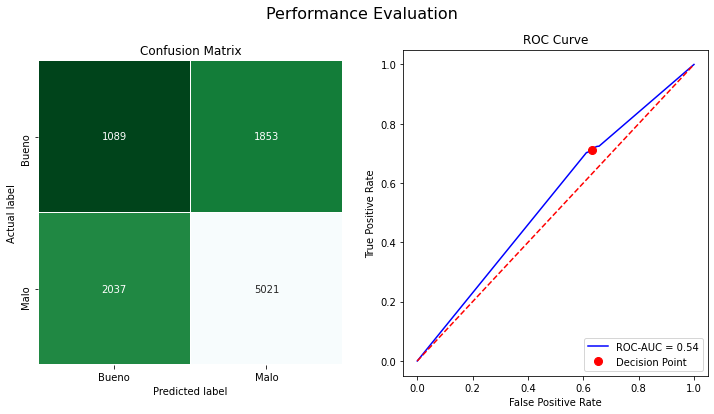

In [121]:
LABELS = ['Bueno', 'Malo']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

In [122]:
from sklearn.base import BaseEstimator, TransformerMixin

In [123]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError('''There are missing values in the array! 
                                Please remove them.''')

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)
        
        self.upper_band_ = mean_vec + self.n_std * std_vec
        self.lower_band_ = mean_vec - self.n_std * std_vec
        self.n_features_ = len(self.upper_band_)
        
        return self 
    
    def transform(self, X, y = None):
        X_copy = pd.DataFrame(X.copy())
        
        upper_band = np.repeat(
            self.upper_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        lower_band = np.repeat(
            self.lower_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        
        X_copy[X_copy >= upper_band] = upper_band
        X_copy[X_copy <= lower_band] = lower_band
        
        return X_copy.values

In [124]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', OutlierRemover())])

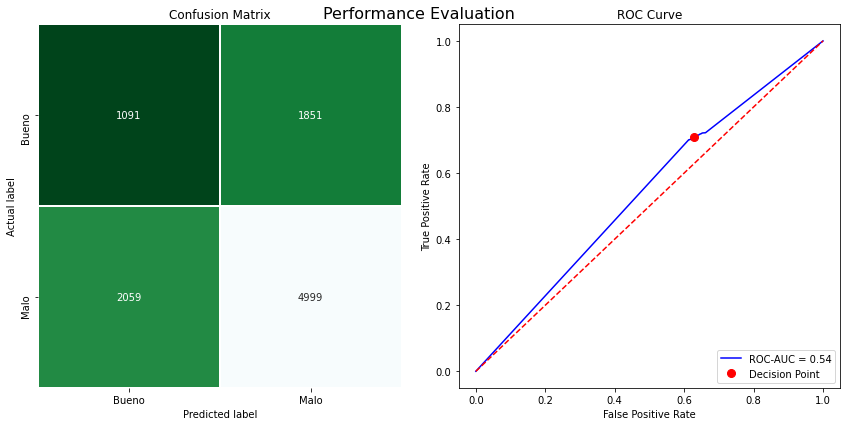

In [125]:
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipeline, num_features),
                                               ('categorical', cat_pipeline, cat_features)],
                                 remainder='drop')

dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', dec_tree)])

tree_pipeline.fit(X_train, y_train)

tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
# plt.savefig('images/ch8_im18.png')
plt.show()

In [126]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)


In [127]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [128]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([0.605875, 0.61475 , 0.607375, 0.60125 , 0.604   ])

In [129]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.20963597, 0.20507026, 0.21133089, 0.2116394 , 0.20690489]),
 'score_time': array([0.03787732, 0.0405364 , 0.03690076, 0.0395155 , 0.03592682]),
 'test_accuracy': array([0.605875, 0.61475 , 0.607375, 0.60125 , 0.604   ]),
 'test_precision': array([0.72444204, 0.73054107, 0.7251977 , 0.72421975, 0.7227616 ]),
 'test_recall': array([0.71276784, 0.71967416, 0.71453869, 0.70267399, 0.7120085 ]),
 'test_roc_auc': array([0.53210532, 0.54266688, 0.53236948, 0.53085429, 0.53068476])}

In [130]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}


In [131]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)
#print(f'Best parameters: {classifier_gs.best_params_}')
#print(f'Recall (Training set): {classifier_gs.best_score_:.4f}')
#print(f'Recall (Test set): {metrics.recall_score(y_test,classifier_gs.predict(X_test)):.4f}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['comp_interno1',
                                                                          'comp_interno3',
                                                                          'comp_externo1',
                                                                      

In [132]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2}
Recall (Training set): 1.0000
Recall (Test set): 1.0000


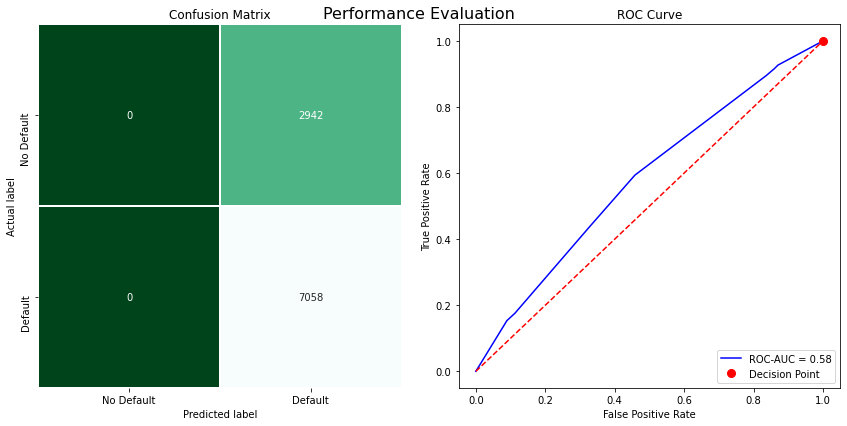

In [133]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im20.png')
plt.show()

In [134]:
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve,  accuracy_score

In [135]:
train_scores, val_scores, leaves = {}, {}, {}
for max_depth in range(1, 26):
    print(max_depth, end=' ', flush=True)
    reg_tree = DecisionTreeClassifier(criterion='gini',
                                          max_depth=max_depth,
                                          min_samples_leaf=10,
                                          random_state=42)
    tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])
    train_scores[max_depth], val_scores[max_depth], leaves[max_depth] = [],[], []
    for train_idx, test_idx in k_fold.split(X_train,y_train):
        X_t, y_t,  = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_te, y_te = X_train.iloc[test_idx], y_train.iloc[test_idx]
        tree_pipeline.fit(X_t, y_t)
        train_pred = tree_pipeline.predict_proba(X=X_t)[:, 1]
        train_score = roc_auc_score(y_score=train_pred, y_true=y_t)
        #print(train_score)
        train_scores[max_depth].append(train_score)

        test_pred = tree_pipeline.predict_proba(X=X_te)[:, 1]
        val_score = roc_auc_score(y_score=test_pred, y_true=y_te)
        val_scores[max_depth].append(val_score)  
        #print(val_score)
        leaves[max_depth].append(max_depth)
        #reg_tree.fit(X=X_t, y=y_t)

        
        #train_scores[max_depth].append(train_score)

        #test_pred = reg_tree.predict(X=X_test)
        #val_score = np.sqrt(mean_squared_error(
        #    y_pred=test_pred, y_true=y_test))
        #val_scores[max_depth].append(val_score)
        #leaves[max_depth].append(get_leaves_count(reg_tree))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

In [136]:
clf_train_scores = pd.DataFrame(train_scores)
clf_valid_scores = pd.DataFrame(val_scores)
bd_leaves = pd.DataFrame(leaves)

In [137]:
leaves

{1: [1, 1, 1, 1, 1],
 2: [2, 2, 2, 2, 2],
 3: [3, 3, 3, 3, 3],
 4: [4, 4, 4, 4, 4],
 5: [5, 5, 5, 5, 5],
 6: [6, 6, 6, 6, 6],
 7: [7, 7, 7, 7, 7],
 8: [8, 8, 8, 8, 8],
 9: [9, 9, 9, 9, 9],
 10: [10, 10, 10, 10, 10],
 11: [11, 11, 11, 11, 11],
 12: [12, 12, 12, 12, 12],
 13: [13, 13, 13, 13, 13],
 14: [14, 14, 14, 14, 14],
 15: [15, 15, 15, 15, 15],
 16: [16, 16, 16, 16, 16],
 17: [17, 17, 17, 17, 17],
 18: [18, 18, 18, 18, 18],
 19: [19, 19, 19, 19, 19],
 20: [20, 20, 20, 20, 20],
 21: [21, 21, 21, 21, 21],
 22: [22, 22, 22, 22, 22],
 23: [23, 23, 23, 23, 23],
 24: [24, 24, 24, 24, 24],
 25: [25, 25, 25, 25, 25]}

In [138]:
clf_train_scores

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.534152,0.569206,0.586953,0.598368,0.619687,0.632392,0.650235,0.666302,0.683407,0.701265,0.721929,0.739990,0.754726,0.768794,0.781152,0.792660,0.801507,0.807046,0.811584,0.814657,0.816863,0.818470,0.819792,0.820925,0.821717
1,0.535192,0.568341,0.586154,0.598658,0.617904,0.632881,0.645445,0.662893,0.680496,0.699638,0.719715,0.740169,0.757575,0.772199,0.785964,0.796985,0.805343,0.811654,0.816033,0.819043,0.820781,0.821783,0.822947,0.823405,0.824104
2,0.535887,0.571318,0.588718,0.601191,0.618805,0.634839,0.648126,0.665155,0.682844,0.700566,0.722016,0.742880,0.760609,0.776932,0.788924,0.799109,0.806414,0.812547,0.816325,0.819549,0.821501,0.822819,0.823425,0.823962,0.824179
3,0.534520,0.569207,0.584016,0.597850,0.617259,0.632421,0.644912,0.659499,0.680205,0.700144,0.720037,0.739170,0.758414,0.774943,0.789046,0.800899,0.809389,0.816348,0.821181,0.825284,0.827109,0.828514,0.829320,0.829621,0.830123
4,0.534767,0.571435,0.587753,0.599963,0.619250,0.634933,0.647936,0.661907,0.678490,0.696291,0.715470,0.734380,0.752820,0.769142,0.782652,0.792917,0.802154,0.808873,0.814068,0.817990,0.820228,0.822548,0.824487,0.825871,0.826476


In [139]:
clf_valid_scores

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.537911,0.572238,0.582578,0.589553,0.599062,0.606945,0.607361,0.617438,0.613950,0.613241,0.606922,0.601280,0.596434,0.593854,0.593878,0.586191,0.584139,0.581255,0.581145,0.580864,0.579513,0.577126,0.576390,0.575310,0.575508
1,0.533749,0.575745,0.588261,0.598149,0.612240,0.613999,0.616322,0.624760,0.622915,0.616222,0.609119,0.602697,0.596278,0.588313,0.582110,0.582566,0.581250,0.584176,0.579660,0.578195,0.578276,0.578523,0.579669,0.580204,0.579671
2,0.530969,0.563562,0.578819,0.586292,0.606021,0.614316,0.613530,0.611921,0.611035,0.605554,0.599178,0.590726,0.586932,0.581713,0.576675,0.572994,0.571927,0.571889,0.571319,0.569526,0.566928,0.568805,0.568277,0.568536,0.569402
3,0.536441,0.571557,0.586638,0.595989,0.608704,0.618281,0.611922,0.605489,0.606667,0.596020,0.588414,0.583533,0.577012,0.570460,0.569094,0.569188,0.567080,0.564389,0.561370,0.559663,0.559394,0.559685,0.559519,0.557966,0.559765
4,0.535450,0.564213,0.582858,0.592461,0.604471,0.612299,0.614276,0.617305,0.611712,0.611522,0.603139,0.597293,0.587139,0.583214,0.581623,0.581176,0.577356,0.575064,0.573087,0.572936,0.572247,0.570056,0.573300,0.569274,0.567478


In [140]:
roc_entrenamiento=[]
for c in clf_train_scores.columns:
    promedio_roc=mean(clf_train_scores[c])
    roc_entrenamiento.append(promedio_roc)
    
roc_validacion=[]
for c in clf_valid_scores.columns:
    promedio_roc=mean(clf_valid_scores[c])
    roc_validacion.append(promedio_roc)

prof=[]
for c in bd_leaves.columns:
    id_=mean(bd_leaves[c])
    prof.append(id_)

In [141]:
roc_entrenamiento

[0.5349037752899319,
 0.5699012953436994,
 0.5867186239361329,
 0.5992058230511768,
 0.6185808679463582,
 0.6334933560067585,
 0.6473306772026264,
 0.6631513158201854,
 0.6810885192752195,
 0.6995807315128205,
 0.7198333689944435,
 0.7393178261938118,
 0.7568288912027836,
 0.7724018667085799,
 0.7855477675990874,
 0.7965141273876707,
 0.8049616357429074,
 0.8112936240988701,
 0.8158381186418664,
 0.8193046285625514,
 0.8212963619986038,
 0.8228269006596383,
 0.8239940656070394,
 0.8247567364864082,
 0.8253200090882252]

In [142]:
roc_validacion

[0.5349037108123651,
 0.569462749278639,
 0.583830688023878,
 0.5924886161251817,
 0.6060998427102235,
 0.6131681335810729,
 0.6126822968999623,
 0.6153827296107867,
 0.6132558172252308,
 0.6085117651440548,
 0.6013544323935511,
 0.5951057000360137,
 0.5887590430659055,
 0.5835110365314737,
 0.5806757882749632,
 0.578422877549169,
 0.5763505908192477,
 0.5753544817766494,
 0.5733162337804314,
 0.5722368645746938,
 0.5712714496210738,
 0.5708389450534576,
 0.5714310449981177,
 0.5702579517707227,
 0.5703650143775445]

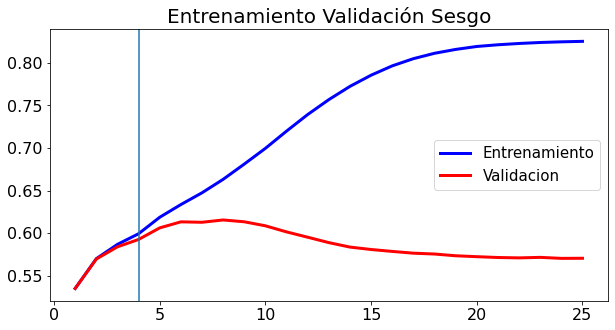

In [143]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Entrenamiento Validación Sesgo",fontsize=20)
ax.plot(prof,roc_entrenamiento,color="blue",linewidth=3,label="Entrenamiento")
ax.plot(prof,roc_validacion,color="red",linewidth=3,label="Validacion")
#gca().yaxis.set_major_formatter("{x:,.0%}")
xticks(fontsize=16)
yticks(fontsize=16)
axvline(4)
legend(fontsize=15)
show()